In [1]:
############importing libraries#############
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot 

In [2]:
os.chdir("D:/Gaikwad/Data/Live Project 1/bike_rental_analysis_final/Bike_renting_project")

In [3]:
###########loading dataset####################
bike_train = pd.read_csv("day.csv")

In [4]:
bike_train.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [5]:
#bike_train.info
#bike_train.describe

In [6]:
############exploratory data analysis#######################
import datetime
bike_train['season']= bike_train['season'].astype('category')
bike_train['yr']=bike_train['yr'].astype('int')
bike_train['mnth']=bike_train['mnth'].astype('category')
bike_train['holiday']=bike_train['holiday'].astype('int')
bike_train['workingday']=bike_train['workingday'].astype('int')
bike_train['weekday']=bike_train['weekday'].astype('category')
bike_train['weathersit']=bike_train['weathersit'].astype('category')
d1=bike_train['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=datetime.datetime.strptime(d1[i],'%Y-%m-%d').strftime('%d')
bike_train['dteday']=d1
bike_train['dteday']=bike_train['dteday'].astype('category')
bike_train = bike_train.drop(['instant','casual', 'registered'], axis=1)

In [7]:
bike_train.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [8]:
############Missing value analysis#################
missing_val = pd.DataFrame()

In [9]:
#missing_val
bike_train.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d208dddf08>,
 'caps': [<matplotlib.lines.Line2D at 0x1d208e01d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d208df1c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1d208e0dec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d208e0dfc8>],
 'means': []}

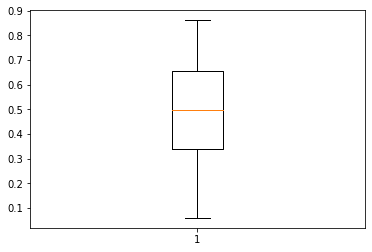

In [10]:
################Outlier Analysis###################

#saving numeric values#
cnames=["temp","atemp","hum","windspeed",]
#ploting boxplotto visualize outliers#
plt.boxplot(bike_train['temp'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d208eb2d48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d208eb6e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d208eb2208>],
 'medians': [<matplotlib.lines.Line2D at 0x1d208ebaf88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d208ebaf08>],
 'means': []}

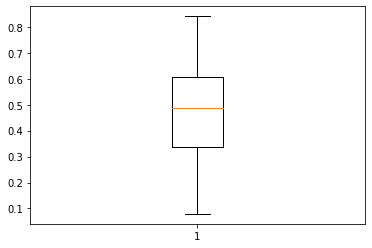

In [11]:
plt.boxplot(bike_train['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25d260cbe88>,
 'caps': [<matplotlib.lines.Line2D at 0x25d26025fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d260cb308>],
 'medians': [<matplotlib.lines.Line2D at 0x25d260d2f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d260d7948>],
 'means': []}

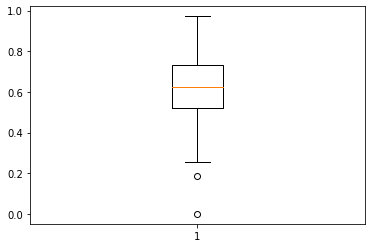

In [11]:
plt.boxplot(bike_train['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d208f256c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d208f25f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d208f22cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d208e7cfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d208f2dfc8>],
 'means': []}

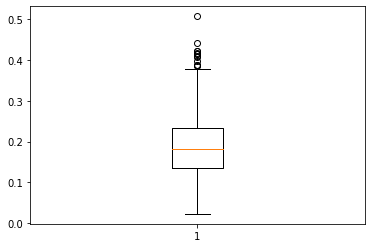

In [12]:
plt.boxplot(bike_train['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d208f92908>,
 'caps': [<matplotlib.lines.Line2D at 0x1d208f968c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d208f8bec8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d208f96fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d208f9bfc8>],
 'means': []}

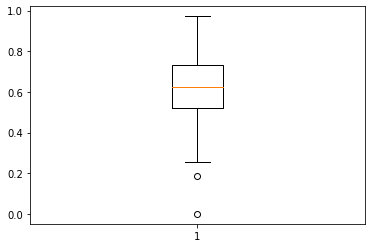

In [13]:
plt.boxplot(bike_train['hum'])

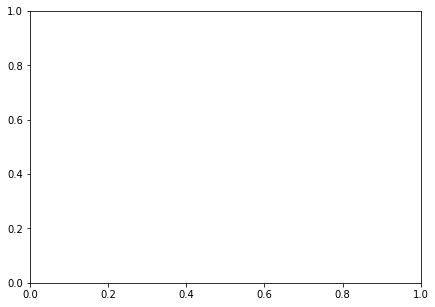

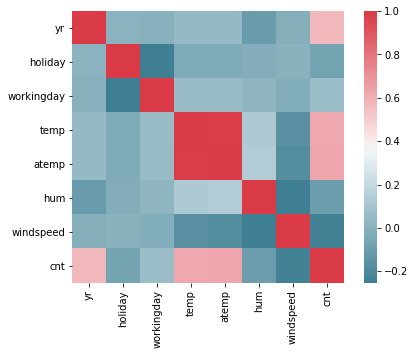

In [14]:
#############Feature Selection ##################
df_corr = bike_train
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


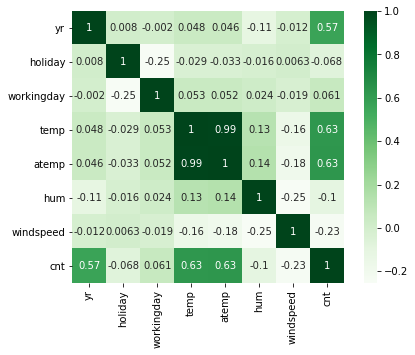

In [15]:
df_corr = bike_train
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Greens',
            square=True,annot= True, ax=ax)
# Dark shades represents positive correlation while lighter shades represents negative correlation.

In [16]:
#droping corelated variable (as per the dark green box as middle in above plot)
bike_train = bike_train.drop(['atemp'], axis=1)

In [17]:
############Modeling ###############################

#dividing data into train and test
train, test = train_test_split(bike_train, test_size=0.2)

In [18]:
######c50#######
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:11], train.iloc[:,11])
predictions_DT = fit_DT.predict(test.iloc[:,0:11])

In [19]:
#predictions_DT

In [20]:
#random forest
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:11], train.iloc[:,11])
RF_Predictions = RFmodel.predict(test.iloc[:,0:11])

In [21]:
#linear regression
#creating dummy variable
data_lr=bike_train.copy()
cat_names = ["season", "dteday", "weathersit", "mnth","weekday"]
for i in cat_names:
    temp = pd.get_dummies(data_lr[i], prefix = i)
    data_lr = data_lr.join(temp)
fields_to_drop = ['dteday', 'season', 'weathersit', 'weekday', 'mnth','cnt']
data_lr = data_lr.drop(fields_to_drop, axis=1)
data_lr=data_lr.join(bike_train['cnt'])

In [22]:
trainlr, testlr = train_test_split(data_lr, test_size=0.2)
model = sm.OLS(trainlr.iloc[:,63], trainlr.iloc[:,0:63]).fit()
predictions_LR = model.predict(testlr.iloc[:,0:63])

In [23]:
#defining MAPE function
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [24]:
#MAPE for decision tree regression
MAPE(test.iloc[:,11], predictions_DT)

28.16338478153137

In [25]:
#MAPE for random forest regression
MAPE(test.iloc[:,11],RF_Predictions)

15.359063476644957

In [26]:
#MAPE for linear regression
MAPE(testlr.iloc[:,63], predictions_LR)

16.518194570521878

In [27]:
result=pd.DataFrame(test.iloc[:,0:11])
result['pred_cnt'] = (RF_Predictions)

result.to_csv("Random forest output python.csv",index=False)